<a href="https://colab.research.google.com/github/mvmarcio/Estudos_Flai/blob/main/Perfil_Profissional_de_Dados_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando os dados
import pandas as pd

caminho = '/content/datahackers-survey-2019-anonymous-responses.csv'
dados = pd.read_csv(caminho)

In [2]:
# Vendo as 5 primeiras linhas:
dados.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,Newsletter Semanal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,

In [3]:
# Visualizando os valores faltantes:
dados.isnull().sum()[dados.isnull().mean() != 0] # filtrando apenas os valores faltantes

('P1', 'age')                                      24
('P2', 'gender')                                    3
('P5', 'living_state')                            337
('P6', 'born_or_graduated')                        34
('P12', 'workers_number')                         238
('P13', 'manager')                                238
('P16', 'salary_range')                           238
('P22', 'most_used_proggraming_languages')        859
('P29', 'have_data_warehouse')                    972
('P35', 'data_science_plataforms_preference')     140
('P35', 'other')                                 1625
('P36', 'draw_participation')                       4
('D1', 'living_macroregion')                      337
('D2', 'origin_macroregion')                     1440
('D3', 'anonymized_degree_area')                   35
('D4', 'anonymized_market_sector')                243
('D5', 'anonymized_manager_level')               1460
('D6', 'anonymized_role')                         514
dtype: int64

In [4]:
# Visualizando os valores faltantes:
dados.isnull().mean()[dados.isnull().mean() != 0].sort_values()

('P2', 'gender')                                 0.001700
('P36', 'draw_participation')                    0.002266
('P1', 'age')                                    0.013598
('P6', 'born_or_graduated')                      0.019263
('D3', 'anonymized_degree_area')                 0.019830
('P35', 'data_science_plataforms_preference')    0.079320
('P12', 'workers_number')                        0.134844
('P13', 'manager')                               0.134844
('P16', 'salary_range')                          0.134844
('D4', 'anonymized_market_sector')               0.137677
('P5', 'living_state')                           0.190935
('D1', 'living_macroregion')                     0.190935
('D6', 'anonymized_role')                        0.291218
('P22', 'most_used_proggraming_languages')       0.486686
('P29', 'have_data_warehouse')                   0.550708
('D2', 'origin_macroregion')                     0.815864
('D5', 'anonymized_manager_level')               0.827195
('P35', 'other

In [5]:
# Visualizando a variável 6 das profissões:
dados["('D6', 'anonymized_role')"].value_counts() # contando as profissões.

Desenvolvedor ou Engenheiro de Software    225
Outras                                     220
Data Scientist/Cientista de Dados          167
Data Analyst/Analista de Dados             163
Business Intelligence/Analista de BI       150
Data Engineer/Engenheiro de Dados          130
Business Analyst/Analista de Negócios       72
Analista de Inteligência de Mercado         29
Engenheiro                                  26
Analista de Marketing                       19
Engenheiro de Machine Learning              15
DBA/Administrador de Banco de Dados         14
Estatístico                                 11
Economista                                  10
Name: ('D6', 'anonymized_role'), dtype: int64

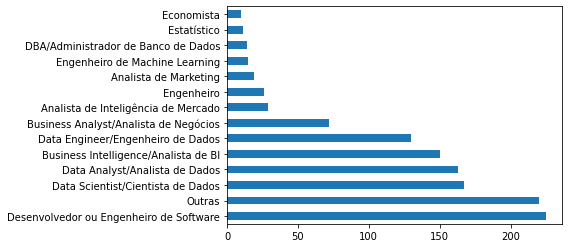

In [6]:
# Plotando o gráfico de colunas da variável das profissões:
dados["('D6', 'anonymized_role')"].value_counts().plot(kind = 'barh')

In [7]:
# Agrupando as profissões para facilitar a análise.

# DBA com engenheiro de dados.
# Anlista de mercado com analista de negócios.

# Vamos agrupar utilizando um dicionário:

profmap = {'Desenvolvedor ou Engenheiro de Software': 'Desenvolvedor/Engenheiro de Software',
           'Outras': 'Outras',
           'Data Scientist/Cientista de Dados': 'Cientista de Dados',
           'Data Analyst/Analista de Dados': 'Analista de Dados',
           'Business Intelligence/Analista de BI': 'Analista de BI',
           'Data Engineer/Engenheiro de Dados': 'Engenheiro de Dados',
           'Business Analyst/Analista de Negócios': 'Analista de BI',
           'Analista de Inteligência de Mercado': 'Analista de BI',
           'Engenheiro': 'Outras',
           'Analista de Marketing': 'Outras',
           'Engenheiro de Machine Learning': 'Cientista de Dados',
           'DBA/Administrador de Banco de Dados': 'Engenheiro de Dados',
           'Estatístico': 'Cientista de Dados',
           'Economista': 'Outras'}

dados['profissao'] = dados["('D6', 'anonymized_role')"].map(profmap)

In [8]:
# Analistando a variável agrupada das profissões:
dados['profissao'].value_counts()

Outras                                  275
Analista de BI                          251
Desenvolvedor/Engenheiro de Software    225
Cientista de Dados                      193
Analista de Dados                       163
Engenheiro de Dados                     144
Name: profissao, dtype: int64

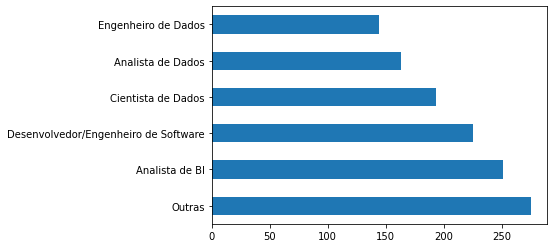

In [9]:
# Plotando a variável agrupada das profissões:
dados['profissao'].value_counts().plot(kind = 'barh')

Agora vamos criar novas variáveis para facilitar a análise, como o tamanho da empresa, salários, entre outras.

In [10]:
# Tamanho da empresa: vamos fazer categorias com o tamanho das empresas

tammap = {'de 1 a 5': 'Pequena',
          'de 6  10': 'Pequena',
          'de 11 a 50': 'Pequena',
          'de 51 a 100': 'Pequena',
          'de 101 a 500': 'Média',
          'de 501 a 1000': 'Média',
          'de 1001 a 3000': 'Grande',
          'Acima de 3000': 'Grande'}

In [11]:
# Ajustando os salários em números:

salamap = { 'Menos de R$ 1.000/mês': 1000,
           'de R$ 1.001/mês a R$ 2.000/mês': 1500,
           'de R$ 2.001/mês a R$ 3000/mês': 2500,
           'de 3.001/mês a R$ 4.000/mês': 3500,
           'de R$ 4.001/mês a R$ 6.000/mês': 5000,
           'de R$ 6.001/mês a R$ 8.000/mês': 7000,
           'de 8.001/mês a R$ 12.000/mês': 10000,
           'de R$ 12.001/mês a R$ 16.000/mês': 14000,
           'de 16.001/mês a R$ 20.000/mês': 18000,
           'de R$ 20.001/mês a R$ 25.000/mês': 22500,
           'Acima de R$ 25.001/mês': 25000}
           
salamap # visualizando

{'Acima de R$ 25.001/mês': 25000,
 'Menos de R$ 1.000/mês': 1000,
 'de 16.001/mês a R$ 20.000/mês': 18000,
 'de 3.001/mês a R$ 4.000/mês': 3500,
 'de 8.001/mês a R$ 12.000/mês': 10000,
 'de R$ 1.001/mês a R$ 2.000/mês': 1500,
 'de R$ 12.001/mês a R$ 16.000/mês': 14000,
 'de R$ 2.001/mês a R$ 3000/mês': 2500,
 'de R$ 20.001/mês a R$ 25.000/mês': 22500,
 'de R$ 4.001/mês a R$ 6.000/mês': 5000,
 'de R$ 6.001/mês a R$ 8.000/mês': 7000}

In [12]:
# Vamos discretizar a idade (fazendo o recorte): vamos utilizar a função cut()

cortes = [0, 24, 30, 40, 100]
nomes = ['[18,24]', '[25, 30]', '[31, 40]', '[41, 50]']

In [13]:
# Colocando as novas variáveis no banco de dados:

dados['idade'] = pd.cut(dados["('P1', 'age')"], bins = cortes, labels = nomes)
dados['idade'].tail()

1760     [18,24]
1761    [31, 40]
1762    [31, 40]
1763    [25, 30]
1764     [18,24]
Name: idade, dtype: category
Categories (4, object): ['[18,24]' < '[25, 30]' < '[31, 40]' < '[41, 50]']

In [14]:
# Colocando as novas variáveis no banco de dados:

dados['salário'] = dados["('P16', 'salary_range')"].map(salamap)
dados['salário'].head()

0    1500.0
1    2500.0
2    5000.0
3    1500.0
4    7000.0
Name: salário, dtype: float64

In [15]:
# Colocando as novas variáveis no banco de dados:

dados['tamanho_da_empresa'] = dados["('P12', 'workers_number')"].map(tammap)
dados['tamanho_da_empresa'].head()

0    Pequena
1     Grande
2     Grande
3    Pequena
4        NaN
Name: tamanho_da_empresa, dtype: object

In [16]:
# Colocando as novas variáveis no banco de dados:

dados['gestor'] = dados["('P13', 'manager')"].map({0: 'não', 1: 'sim'})
dados['gestor'].head()

0    não
1    não
2    não
3    não
4    sim
Name: gestor, dtype: object

In [17]:
# Colocando as novas variáveis no banco de dados:

dados['se_considera_ds'] = dados["('P19', 'is_data_science_professional')"].map({0: 'não', 1: 'sim'})
dados['se_considera_ds'].head()

0    não
1    sim
2    sim
3    sim
4    sim
Name: se_considera_ds, dtype: object

In [18]:
# Colocando as novas variáveis no banco de dados:

dados['sexo'] = dados["('P2', 'gender')"]
dados['sexo'].head()

0    Masculino
1     Feminino
2    Masculino
3    Masculino
4    Masculino
Name: sexo, dtype: object

In [19]:
# Colocando as novas variáveis no banco de dados:

dados['sexo2'] = dados['sexo'].map({'Masculino':1, 'Feminino': 0})
dados['sexo2'].head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: sexo2, dtype: float64

In [20]:
# Colocando as novas variáveis no banco de dados:

dados['experiencia_ds'] = dados["('P17', 'time_experience_data_science')"]
dados['experiencia_ds']

0       Não tenho experiência na área de dados
1                               Menos de 1 ano
2                                de 1 a 2 anos
3                               Menos de 1 ano
4                                de 4 a 5 anos
                         ...                  
1760    Não tenho experiência na área de dados
1761                             de 2 a 3 anos
1762                             de 2 a 3 anos
1763                             de 4 a 5 anos
1764                            Menos de 1 ano
Name: experiencia_ds, Length: 1765, dtype: object

In [21]:
# Colocando as novas variáveis no banco de dados:

dados['tipo_de_trabalho'] = dados["('P10', 'job_situation')"]
dados['escolaridade'] = dados["('P8', 'degreee_level')"]
dados['area_de_formacao'] = dados["('D3', 'anonymized_degree_area')"]
dados['setor_de_mercado'] = dados["('D4', 'anonymized_market_sector')"]
dados['plataforma_favorita'] = dados["('P35', 'data_science_plataforms_preference')"]

In [22]:
# Visualizando as primeiras linhas dos dados:
dados.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')",profissao,idade,salário,tamanho_da_empresa,gestor,se_considera_ds,sexo,sexo2,experiencia_ds,tipo_de_trabalho,escolaridade,area_de_formacao,setor_de_mercado,plataforma_favorita
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras,Outras,"[31, 40]",1500.0,Pequena,não,não,Masculino,1.0,Não tenho experiência na área de dados,Empregado (CTL),Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Outras,Nunca fiz cursos online
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados,Analista de Dados,"[18,24]",2500.0,Grande,não,sim,Feminino,0.0,Menos de 1 ano,Empregado (CTL),Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Educação,NaN
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras,Outras,"[25, 30]",5000.0,Grande,não,sim,Masculino,1.0,de 1 a 2 anos,Empregado (CTL),Graduação/Bacharelado,Outras Engenharias,Indústria (Manufatura),Udemy
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1

In [23]:
# Pegando os nomes das colunas:
dados.columns

Index(['('P0', 'id')', '('P1', 'age')', '('P2', 'gender')',
       '('P3', 'living_in_brasil')', '('P5', 'living_state')',
       '('P6', 'born_or_graduated')', '('P8', 'degreee_level')',
       '('P10', 'job_situation')', '('P12', 'workers_number')',
       '('P13', 'manager')',
       ...
       'gestor', 'se_considera_ds', 'sexo', 'sexo2', 'experiencia_ds',
       'tipo_de_trabalho', 'escolaridade', 'area_de_formacao',
       'setor_de_mercado', 'plataforma_favorita'],
      dtype='object', length=184)

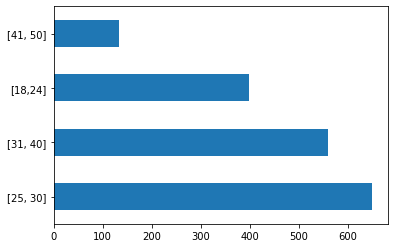

In [24]:
dados['idade'].value_counts().plot(kind = 'barh')

In [29]:
# Media salarial dos profissionais de dados:
import numpy as np

dados['salário'].mean()

5504.873294346979

In [34]:
# Média salarial do cientista de dados

round(dados[dados['profissao'] == 'Cientista de Dados']['salário'].mean(), 3)

6209.302

In [32]:
# Mediana salarial do cientista de dados

dados[dados['profissao'] == 'Cientista de Dados']['salário'].median()

5000.0

In [36]:
# Média salarial dos engenheiros de dados:

round(dados[dados['profissao'] == 'Engenheiro de Dados']['salário'].mean(), 2)

6956.52

In [38]:
# Salários por profissão:

dados.groupby('profissao')['salário'].mean().round(2)

profissao
Analista de BI                          4464.50
Analista de Dados                       4495.00
Cientista de Dados                      6209.30
Desenvolvedor/Engenheiro de Software    4233.33
Engenheiro de Dados                     6956.52
Outras                                  4348.04
Name: salário, dtype: float64

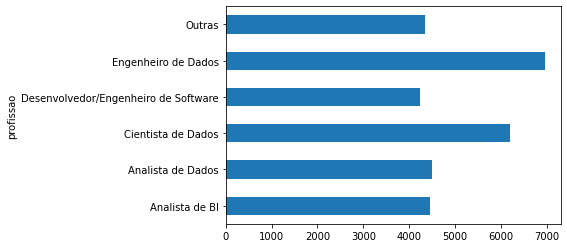

In [39]:
# Gráfico de salário por profissão:

dados.groupby('profissao')['salário'].mean().round(2).plot(kind = 'barh')

# Os maiores salários são dos engenehiros de dados.

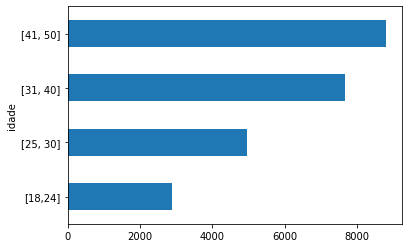

In [45]:
# Gráfico de salários por idade:

dados.groupby('idade')['salário'].mean().round(2).plot(kind = 'barh');

# O grupo de de 41 a 50 tem uma média salarial maior. 

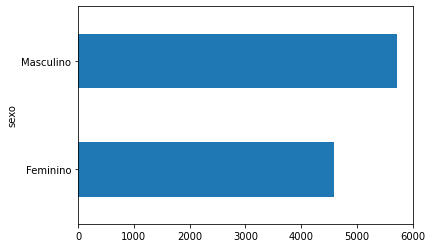

In [46]:
# Salário por sexo:

dados.groupby('sexo')['salário'].mean().round(2).plot(kind = 'barh');

# O sexo feminino ganha menos que o masculino. 

In [55]:
# Vendo a diferença salarial entre homens e mulheres:

sal_sexo = dados.groupby('sexo')['salário'].mean().round(2)

diff_sexo = round(1-(sal_sexo[0]/sal_sexo[1]), 3)
diff_sexo

# Mulheres ganham 19,7% a menos que os homens na amostra. 

0.197

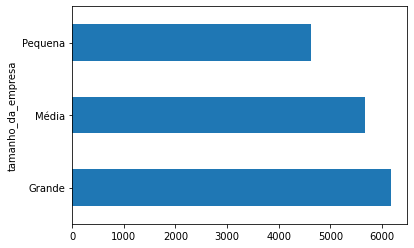

In [48]:
# Salário por tamanho de empresas:

dados.groupby('tamanho_da_empresa')['salário'].mean().round(2).plot(kind = 'barh');

# Empresas grandes pagam salários maiores.

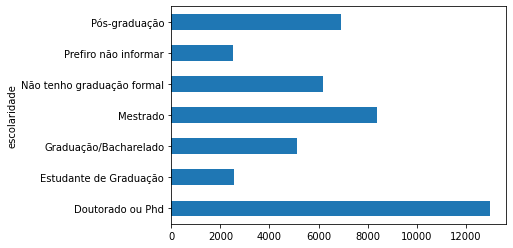

In [49]:
# Salário por escolaridade:

dados.groupby('escolaridade')['salário'].mean().round(2).plot(kind = 'barh');

# Profissionais com doutorado e Phd ganham muito mais. 

In [56]:
# Contabilizando o grau de instrução:

dados.groupby('escolaridade')['salário'].count()

escolaridade
Doutorado ou Phd               25
Estudante de Graduação        247
Graduação/Bacharelado         340
Mestrado                       83
Não tenho graduação formal     21
Prefiro não informar            1
Pós-graduação                 309
Name: salário, dtype: int64

In [58]:
# Agrupando por sexo e tamanho de empresa:

dados.groupby(['sexo', 'tamanho_da_empresa'])['salário'].mean().unstack().round(2) 

# O unstack deixa a saída do comando no formato de uma tabela organizada. 
# Em todo tamanho de empresa a discrepância salarial persiste. 

tamanho_da_empresa,Grande,Média,Pequena
sexo,,,
Feminino,5231.88,4777.78,3660.38
Masculino,6416.10,5875.46,4854.98


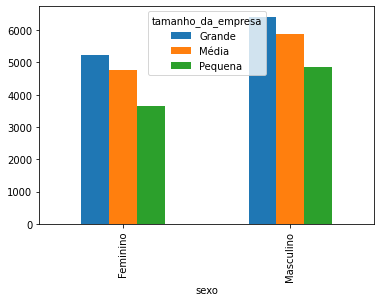

In [61]:
# Fazendo um gráfico por sexo e tamanho da empresa:

dados.groupby(['sexo', 'tamanho_da_empresa'])['salário'].mean().unstack().plot(kind = 'bar');

# O unstack neste caso faz o agrupamento dos dados.

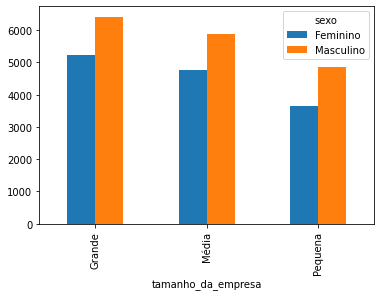

In [62]:
# Transpondo o gráfico do sexo e tamanho da empresa:

dados.groupby(['sexo', 'tamanho_da_empresa'])['salário'].mean().unstack().T.plot(kind = 'bar');

# Agora o agrupamento foi por tamanho de empresa.

# O unstack neste caso faz o agrupamento dos dados.

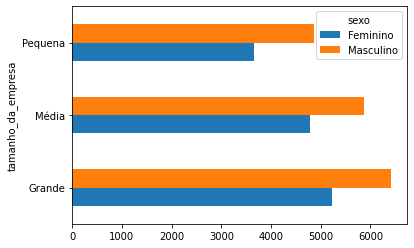

In [63]:
# Transpondo o gráfico do sexo e tamanho da empresa:

dados.groupby(['sexo', 'tamanho_da_empresa'])['salário'].mean().unstack().T.plot(kind = 'barh');

# Agora o agrupamento foi por tamanho de empresa.

# O unstack neste caso faz o agrupamento dos dados.

In [65]:
# Usando o método filter para filtrar os dados com a função filter do Pandas:

dados.filter(regex = 'P20').mean().sort_values(ascending = False) #vai pegar todas as colounas que contenham P20 (pergunta P20)

# As técnicas mais utilizadas foram regressão linear e árvores de decisão.

('P20', 'linear_regression')             0.296884
('P20', 'decision_tree')                 0.249858
('P20', 'logistic_regression')           0.230028
('P20', 'cluster_analysis')              0.208499
('P20', 'random_forest')                 0.203399
('P20', 'neural_networks')               0.151275
('P20', 'nlp')                           0.142776
('P20', 'bayesian_inference')            0.126912
('P20', 'no_listed_methods')             0.108782
('P20', 'svms')                          0.101983
('P20', 'gradient_boosted_machines')     0.100283
('P20', 'ensemble')                      0.095751
('P20', 'glms')                          0.075921
('P20', 'cnns')                          0.057224
('P20', 'longitudinal_data_analysis')    0.057224
('P20', 'rnns')                          0.055524
('P20', 'joint analysis')                0.044759
('P20', 'markov_chains')                 0.044759
('P20', 'survival_analysis')             0.040793
('P20', 'gans')                          0.013598


In [67]:
# Técnicas mais utilizadas pelos cientistas de dados:

cds = dados[dados['profissao'] == 'Cientista de Dados']

cds.filter(regex = 'P20').mean().sort_values(ascending = False)

# As técnicas mais utilizadas pelos cientistas de dados foram a regressão linear e as árvores de decisão.

('P20', 'linear_regression')             0.740933
('P20', 'logistic_regression')           0.673575
('P20', 'decision_tree')                 0.652850
('P20', 'random_forest')                 0.647668
('P20', 'cluster_analysis')              0.601036
('P20', 'neural_networks')               0.461140
('P20', 'gradient_boosted_machines')     0.445596
('P20', 'ensemble')                      0.398964
('P20', 'nlp')                           0.352332
('P20', 'bayesian_inference')            0.321244
('P20', 'svms')                          0.305699
('P20', 'glms')                          0.290155
('P20', 'rnns')                          0.181347
('P20', 'longitudinal_data_analysis')    0.176166
('P20', 'cnns')                          0.165803
('P20', 'markov_chains')                 0.134715
('P20', 'survival_analysis')             0.134715
('P20', 'joint analysis')                0.067358
('P20', 'gans')                          0.046632
('P20', 'hmms')                          0.041451


In [68]:
# Linguagens de programação mais utilizadas:

cds.filter(regex = 'P21').mean().sort_values(ascending = False)

# A linguagem mais utilizada pelos cientistas de dados foi o Python. 
# As linguagens mais utilizadas foram Python, SQL e R. 
# Aprender Python é fundamental para o cientista de dados.

('P21', 'python')                 0.896373
('P21', 'sql_')                   0.730570
('P21', 'r')                      0.383420
('P21', 'sas_stata')              0.088083
('P21', 'scala')                  0.082902
('P21', 'visual_basic_vba')       0.051813
('P21', 'java')                   0.041451
('P21', 'c_c++_c#')               0.031088
('P21', 'matlab')                 0.025907
('P21', 'julia')                  0.010363
('P21', 'dotnet')                 0.010363
('P21', 'php')                    0.005181
('P21', 'no_listed_languages')    0.000000
dtype: float64

In [69]:
# Ferramentas de BI mais utilizadas no trabalho:

cds.filter(regex = 'P27').mean().sort_values(ascending = False)

# A ferramenta mais utilizada foi o MS Power BI

('P27', 'microsoft_powerbi')               0.336788
('P27', 'no_bi_tool_at_work')              0.217617
('P27', 'metabase')                        0.186528
('P27', 'tableau')                         0.176166
('P27', 'google_data_studio')              0.134715
('P27', 'qlik_view_qlik_sense')            0.088083
('P27', 'other')                           0.077720
('P27', 'only_excel_gsheets')              0.077720
('P27', 'redash')                          0.041451
('P27', 'ibm_analytics_cognos')            0.025907
('P27', 'microstrategy')                   0.020725
('P27', 'superset')                        0.020725
('P27', 'looker')                          0.015544
('P27', 'oracle_business_intelligence')    0.005181
('P27', 'sap_business_objects')            0.005181
('P27', 'birst')                           0.000000
dtype: float64

In [73]:
# Salário de quem programa em Python:

round(cds[cds["('P21', 'python')"] == 1]['salário'].mean(), 2)

6202.59

In [76]:
# Salário de quem programa em R:

round(cds[cds["('P21', 'r')"] == 1]['salário'].mean(), 2)

6122.22

In [78]:
# Salário de quem programa em SQL:

round(cds[cds["('P21', 'sql_')"] == 1]['salário'].mean(), 2)

6313.83

In [82]:
# Salário médio de quem programa em R e Python:

round(cds[(cds["('P21', 'python')"] == 1) & (cds["('P21', 'r')"] == 1)]['salário'].mean(), 2)

6320.51

In [83]:
# Salário de quem programa em Python e não usa R:

round(cds[(cds["('P21', 'python')"] == 1) & (cds["('P21', 'r')"] == 0)]['salário'].mean(), 2)

6142.86

In [84]:
# Salário de quem programa em R e não usa Python:

round(cds[(cds["('P21', 'python')"] == 0) & (cds["('P21', 'r')"] == 1)]['salário'].mean(), 2)

4833.33

In [85]:
# Salário de quem programa não usa R ou Python:

round(cds[(cds["('P21', 'python')"] == 0) & (cds["('P21', 'r')"] == 0)]['salário'].mean(), 2)

# O salário médio de quem não usa essas duas linguagens foi muito maior.

7500.0

In [93]:
# Contagem de quem não usa R ou Python:

round(cds[(cds["('P21', 'python')"] == 0) & (cds["('P21', 'r')"] == 0)]['salário'].count(), 2)

# Apenas 7 pessoas não utilizam R ou Python.

7

In [94]:
# Salário de quem usa SAS e Stata:

round(cds[cds["('P21', 'sas_stata')"] == 1]['salário'].mean(), 2)

# O salário médio de quem usa SAS é muito maior. 

8769.23

In [96]:
# Contagem de pessoas que utilizam SAS:

cds[cds["('P21', 'sas_stata')"] == 1]['salário'].count()

13

In [100]:
# Idadde média de quem programa em SAS:

cds[cds["('P21', 'sas_stata')"] == 1]["('P1', 'age')"].mean()

# A idade média para quem usa SAS foi de 29,5, não muito alta.

29.5

In [101]:
# Salário de quem programa em SAS por tamanho da empresa:

cds[cds["('P21', 'sas_stata')"] == 1].groupby('tamanho_da_empresa').count()['salário']

# A tendência de quem usa SAS é estar em empresas grandes.

tamanho_da_empresa
Grande     7
Média      4
Pequena    2
Name: salário, dtype: int64

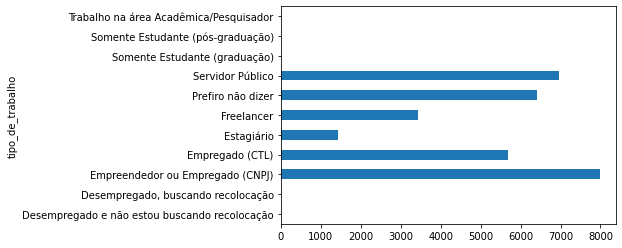

In [102]:
# Agrupando por tipo de trabalho:

dados.groupby('tipo_de_trabalho')['salário'].mean().round(2).plot(kind = 'barh')

In [103]:
# Agrupando por tipo de trabalho:

dados.groupby('tipo_de_trabalho')['salário'].count()

# A maioria das pessoas estão contratadas como CLT.

tipo_de_trabalho
Desempregado e não estou buscando recolocação      0
Desempregado, buscando recolocação                 0
Empreendedor ou Empregado (CNPJ)                 156
Empregado (CTL)                                  688
Estagiário                                       130
Freelancer                                        17
Prefiro não dizer                                  5
Servidor Público                                  30
Somente Estudante (graduação)                      0
Somente Estudante (pós-graduação)                  0
Trabalho na área Acadêmica/Pesquisador             0
Name: salário, dtype: int64

In [107]:
# Salário médio por tipo de trabalho:

dados.groupby('tipo_de_trabalho')['salário'].mean().round(2)

# A maioria das pessoas estão contratadas como CLT.

tipo_de_trabalho
Desempregado e não estou buscando recolocação        NaN
Desempregado, buscando recolocação                   NaN
Empreendedor ou Empregado (CNPJ)                 7977.56
Empregado (CTL)                                  5693.31
Estagiário                                       1438.46
Freelancer                                       3441.18
Prefiro não dizer                                6400.00
Servidor Público                                 6966.67
Somente Estudante (graduação)                        NaN
Somente Estudante (pós-graduação)                    NaN
Trabalho na área Acadêmica/Pesquisador               NaN
Name: salário, dtype: float64